# A straightforward notebook: data science models

### a range of data sci models and their application & notes 
### about the models, how and when to use them

Contents:
  - Regression
    - Simple linear regression - visual with seaborn

  ### For SQL, see separate notebook


### Broad import statements

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
            # data sourcing:
import csv
            # databases:
import sqlite3
            # data toolkit:
import numpy as np
import pandas as pd
            # plotting
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns


In [4]:
            # models
import statsmodels.api as sm
import statsmodels.formula.api as smf

# to check for colinearity (<10 indicates likely safe)
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif


# CHEATSHEETS
[SQL Cheatsheet](https://learnsql.com/blog/ultimate-sql-cheat-sheet/All-sql-cheat-sheet-a4.pdf)

[Numpy Cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf)

[Pandas Cheatsheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

#

# Simple linear regression - visual with seaborn

In [5]:
mpg = sns.load_dataset("mpg").dropna()
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [6]:
mpg.describe().applymap(lambda x: round(x))
# note: applymap to apply to every item in a dataframe

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392,392,392,392,392,392,392
mean,23,5,194,104,2978,16,76
std,8,2,105,38,849,3,4
min,9,3,68,46,1613,8,70
25%,17,4,105,75,2225,14,73
50%,23,4,151,94,2804,16,76
75%,29,8,276,126,3615,17,79
max,47,8,455,230,5140,25,82


# Regress 
###   ___________ weight (dependent variable / target)
# on 
###   ___________ horsepower (independent variable / feature)

## see [interactive demonstration of linear regression](https://setosa.io/ev/ordinary-least-squares-regression/)

# nb. OLS is very sensitive to outliers!

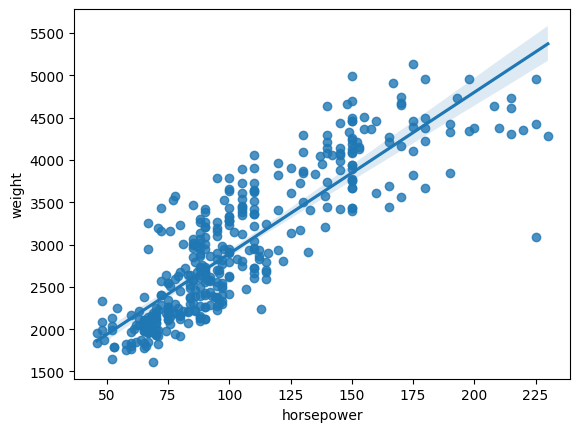

In [7]:
sns.regplot(x='horsepower', y='weight', data=mpg);


Interpretation

❌ "Higher horsepower causes higher weight"

✅ "Powerful cars seem heavier"

    By how much? Measured by the slope of the line = β1

In [8]:
# ..................

"Horsepower seems to explain a good deal of the weights' variations"

    How much?
    

In [9]:
round(mpg.corr(),2) # measures how much features contribute:

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.00,-0.78,-0.81,-0.78,-0.83,0.42,0.58
cylinders,-0.78,1.00,0.95,0.84,0.90,-0.50,-0.35
displacement,-0.81,0.95,1.00,0.90,0.93,-0.54,-0.37
horsepower,-0.78,0.84,0.90,1.00,0.86,-0.69,-0.42
weight,-0.83,0.90,0.93,0.86,1.00,-0.42,-0.31
acceleration,0.42,-0.50,-0.54,-0.69,-0.42,1.00,0.29
model_year,0.58,-0.35,-0.37,-0.42,-0.31,0.29,1.00


In [10]:
## R-squared (r2) is often preferred, from [0 to 1]
print('R-Squared = ', (mpg.corr()['weight']['horsepower'])**2)
# i.e. in this case, nearly 75% of the change in weight is explained by the variance of horsepower

R-Squared =  0.7474254996898221


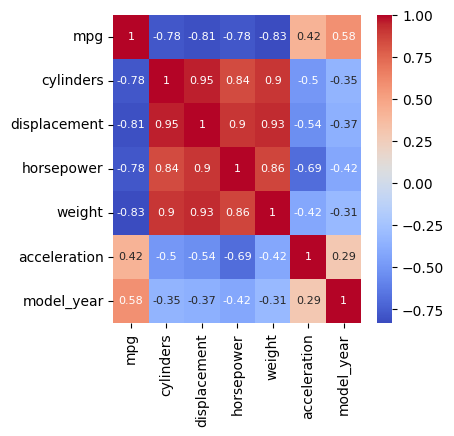

In [11]:
plt.figure(figsize = (4,4))
sns.heatmap(round(mpg.corr(),2), cmap = "coolwarm", annot = True, annot_kws = {"size":8});

# The higher the R^2 the closer all the points are to the suggested regression line.

# ...
# ...
# to understand regression, refer to: [regression introduction](/home/hughharford/code/hughharford/data-challenges-reboot/04-Decision-Science/03-Linear-Regression/01-Orders-Regression/orders_regression.ipynb)

F-statistic 
    greater than 1 means statistically significant
    
R2 - provides a measure of: 
    explainability of target variation by features

P-value 
    if the p-values are low, this indicates low probability that the shape is accidental/random

In [12]:
# Regression Diagnostic Cheat Sheet
# Check 	                  Description 	                                                                        Diagnosis
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Goodness-of-fit 	          The model explains a good deal of the observed variance of the dependent variable 	R-square
# Statistical significance 	  Can we trust the regression coefficients of the model - do they generalize? 	        p-values and F-statistic
# Inference conditions 	      Random Residuals: zero-mean, constant variance, not correlated 	                    Residual plots

# NOTE: 
### Low R-squared is common when the number of observations (n) is much higher than the number of features (p). 
### Relevant insights can still be derived from such regressions, provided they are statistically significant

###

###

_______________________
# Multivariate Regression

In [13]:
from olist.seller import Seller
seller = Seller()
sellers = seller.get_training_data()
sellers.head(2)

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,n_orders,quantity,quantity_per_order,sales,share_of_one_stars,share_of_five_stars,review_score
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.0,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,4.0,3,3,1.000,218.70,0.333333,0.333333,3.00
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.0,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,14.0,40,41,1.025,11703.07,0.050000,0.725000,4.55


In [14]:
# must standardise to prevent undue effects due to orders of magnitude
def standardize(df, features):
    df_standardized = df.copy()
    for f in features:
        mu = df[f].mean()
        sigma = df[f].std()
        df_standardized[f] = df[f].map(lambda x: (x - mu) / sigma)
    return df_standardized

In [15]:
features = ['delay_to_carrier', 'wait_time', 'n_orders', 'quantity', 'quantity_per_order', 'sales']
sellers_standardized = standardize(sellers, features)
model = smf.ols(formula=f"review_score ~ {'+ '.join(features)}", data=sellers_standardized).fit()

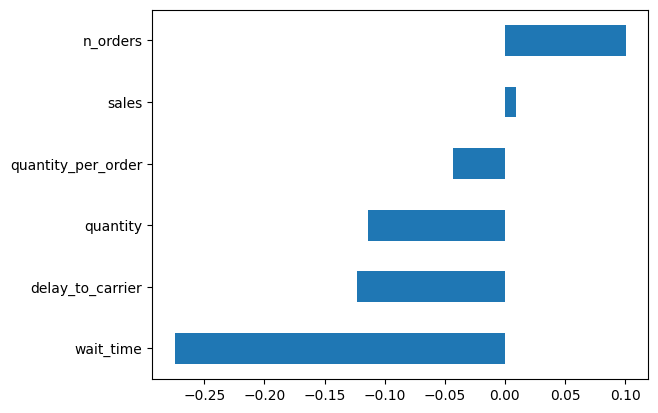

In [16]:
model.params[1:].sort_values().plot(kind='barh');

In [17]:
model.rsquared

0.19430209074601945

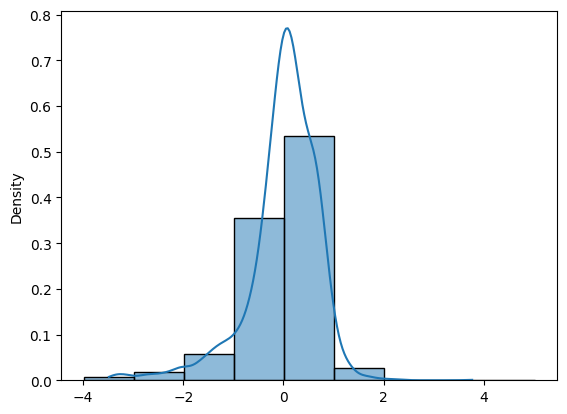

In [18]:
# plot the residuals to check the mean is zero
sns.histplot(model.resid, kde=True, stat='density', discrete=True);

In [19]:
# must also check for colinearity / multicolinearity - use VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

X_standardized = sellers_standardized[features]
X_standardized.head()

,delay_to_carrier,wait_time,n_orders,quantity,quantity_per_order,sales
0,-0.167974,0.124366,-0.285964,-0.287186,-0.357945,-0.306525
1,-0.167974,-0.434800,0.059240,0.025534,-0.301070,0.502699
2,-0.167974,-1.145404,-0.304624,-0.303645,-0.357945,-0.310802
3,-0.167974,-0.915549,-0.304624,-0.303645,-0.357945,-0.316299
4,1.292828,3.278353,-0.304624,-0.303645,-0.357945,-0.310098


In [20]:
df = pd.DataFrame()
df["features"] = X_standardized.columns
df["vif_index"] = [vif(X_standardized.values, i) for i in range(X_standardized.shape[1])]
round(df,2)

,features,vif_index
0,delay_to_carrier,1.28
1,wait_time,1.28
2,n_orders,79.82
3,quantity,78.56
4,quantity_per_order,1.03
5,sales,2.77


In [ ]:
# <10 VIF index is ok, so shows clearly n_orders and quantity are colinear
# makes sense...

In [21]:
# remove quantity
features = ['delay_to_carrier', 'wait_time', 'n_orders', 'quantity_per_order', 'sales']

In [22]:
X_standardized = sellers_standardized[features]
df = pd.DataFrame()
df["features"] = X_standardized.columns
df["vif_index"] = [vif(X_standardized.values, i) for i in range(X_standardized.shape[1])]
round(df,2)

,features,vif_index
0,delay_to_carrier,1.28
1,wait_time,1.28
2,n_orders,2.77
3,quantity_per_order,1.00
4,sales,2.77
